## Capstone Project: The Battle of Neighborhoods [Part - 02]

### Mission

Clearly define a problem or an idea of your choice, where you would need to leverage the Foursquare location data to solve or execute. Remember that data science problems always target an audience and are meant to help a group of stakeholders solve a problem, so make sure that you explicitly describe your audience and why they would care about your problem.

This submission will eventually become your Introduction/Business Problem section in your final report. So I recommend that you push the report (having your Introduction/Business Problem section only for now) to your Github repository and submit a link to it.

A description of the data and how it will be used to solve the problem. (15 marks)

## Required Data


The data necessary to resolve the requested information is:

Input data:
1. The Hotel address and coordinates: latitude and longitude. This information is important since it will help to locate the places of leisure, entertainment and services located near the lodging hotel.

2. The places of leisure, entertainment and services that are located near the hotel.

Output data:

1. List or report of the places of leisure, entertainment and services located near the hotel.
2. Distance between the hotel and the places.
3. List by categories.
4. List by Rating.
5. Like List.
6. Maps displaying localized places.



In this section a description of the data and how it will be used to solve the problem is provided. 

## How to solve the Problem

The address of the hotel will be used as input data to obtain more data on the categories of venues requested by the tourist or group of tourists and using data preparation tools, data analysis and data visualization, I will be able to obtain the results desired and be able to deliver to the end user the information they will use.


## Libraries to use


In [1]:
%reset -f
import matplotlib.pyplot as plt
import numpy as np 
from pandasql import *
import pandas as pd
from pandas.io.json import json_normalize
# visualization Data
import folium
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import requests
# to calcule distance two points
from geopy.distance import geodesic

import warnings
warnings.filterwarnings("ignore")

print("Libraries Loaded")

Libraries Loaded


## Data preparation

In [2]:
## Get latitude and longitude The Hotel Data 

#Foursquare Credentials to Acces API FourSquare
CLIENT_ID = 'XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX'
CLIENT_SECRET = 'XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX'
VERSION = 'XXXXXXX'

name = "Hotel Pennsylvania" # Venue Name to search in FourSquare API
city = "Manhattan, NY" # City where We will find the Hotel
LIMIT = 1 # Limit the response to one item
url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&near={}&query={}&limit={}'.format(
        CLIENT_ID, 
        CLIENT_SECRET, 
        VERSION,
        city,
        name,
        LIMIT)
datarequested = requests.get(url).json()
datahotel = datarequested['response']['venues'][0]

hid = datahotel['id']
haddress = datahotel['location']['address']
hlatitude = datahotel['location']['lat']
hlongitude = datahotel['location']['lng']
origin = (hlatitude, hlongitude)
print("The Latitude and Longitude of Hotel Penssylvania Hotel are: Lat: ", round(hlatitude, 6), "  Longitude: ", round(hlongitude, 6))

The Latitude and Longitude of Hotel Penssylvania Hotel are: Lat:  40.749904   Longitude:  -73.99104


In [3]:
#Setting the Categories the tourist are interested in
namesel = ['Rental Car Location', 'Bank', 'Nightclub', 'Theater', 'Movie Theater', 'National Park']

LIMIT = 50 
city = 'Manhattan, NY'

# Accesing foursquare to request venues related with the category 
locations = {}
for selection in namesel:
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&near={}&limit={}&query={}'.format(
        CLIENT_ID, 
        CLIENT_SECRET, 
        VERSION,
        hlatitude,
        hlongitude,
        city,
        LIMIT,
        selection)
    locations[selection] = requests.get(url).json()

In [4]:
data_venues={}
for catid in namesel:
    venues = json_normalize(locations[catid]['response']['groups'][0]['items'])
    data_venues[catid] = venues[['venue.name', 'venue.id', 'venue.location.address', 'venue.location.lat', 'venue.location.lng']]
    data_venues[catid].columns = ['Name', 'ID', 'Address', 'Lat', 'Lng']

In [5]:
Datanyc = pd.DataFrame(columns=['Name', 'ID', 'Address', 'Lat', 'Lng','Category'])
for catid in namesel:
    Datatemp = pd.DataFrame(data_venues[catid], columns=['Name', 'ID', 'Address', 'Lat', 'Lng'])
    Datatemp['Category'] = catid
    Datanyc = Datanyc.append(Datatemp, ignore_index=True)

Datanyc.dropna(how='all')    #to drop if all values in the row are nan    
Datanyc = Datanyc[['Category','Name', 'ID', 'Address', 'Lat', 'Lng']]
Datanyc.reset_index(drop=True, inplace=True)

Datanyc.head(10)

,Category,Name,ID,Address,Lat,Lng
0,Rental Car Location,Enterprise Rent-A-Car,4ad49a36f964a5204fe820e3,106 W 24th St,40.743671,-73.992900
1,Rental Car Location,Enterprise Rent-A-Car,4b60f29bf964a520fb022ae3,667 11th Ave,40.765045,-73.995458
2,Rental Car Location,Enterprise Rent-A-Car,4ba7e70cf964a52045bd39e3,403 E 65th St,40.763286,-73.958469
3,Rental Car Location,Hertz,4ba4d846f964a5208dba38e3,210 W 77th St,40.782047,-73.979798
4,Rental Car Location,Hertz,4bffd279f326ef3bcc2d0604,337 East 64th Street,40.763184,-73.960190
5,Rental Car Location,National Car Rental,4c28ab99d26eb713e64914d1,219 W 77th St,40.782299,-73.980380
6,Rental Car Location,National Car Rental,4e1591fbb61c42e7c54bfba0,252 W 40th St,40.755978,-73.990261
7,Rental Car Location,National Car Rental,4db3202293a017099dbcd1b1,138 E 50th St #146,40.756193,-73.971814
8,Rental Car Location,National Car Rental,5646c3dc498eec5cc3dbbac7,320 W 57th St,40.766881,-73.983699
9,Rental Car Location,National Car Rental,4bf5bddc9abec9b6c19624e8,142 E 31st St,40.744177,-73.980199


In [16]:
Datanyc.groupby(["Category"])["Category"].count()

Category
Bank                   50
Movie Theater          50
National Park          12
Nightclub              50
Rental Car Location    50
Theater                50
Name: Category, dtype: int64

In [25]:
maps = {}
numcat = -1
for cate in namesel:
    city_lat = hlatitude
    city_lng = hlongitude
    numcat = numcat + 1
    maps[numcat] = folium.Map(location=[city_lat, city_lng], zoom_start=13)
    folium.CircleMarker(location=[city_lat, city_lng],radius=25,popup='Pensilvania Hotel',color='#3186cc',fill=True,
    fill_color='#3186cc').add_to(maps[numcat])
    dataframetemp = Datanyc[(Datanyc.Category == cate)]
    Rows = dataframetemp.shape[0]
    for num in range(Rows - 1):
        lat = dataframetemp['Lat'].values[num]
        lng = dataframetemp['Lng'].values[num]
        label = dataframetemp['Name'].values[num]
        label = folium.Popup(label, parse_html=True)
        folium.CircleMarker(
            [lat, lng],
            radius=5,
            popup=label,
            color='blue',
            fill=True,
            fill_color='#3186cc',
            fill_opacity=0.7,
            parse_html=False).add_to(maps[numcat])

In [27]:
maps[1]

In [28]:
maps[0]

In [59]:
mapsdist = {}
numcat = -1
for cate in namesel:
    city_lat = hlatitude
    city_lng = hlongitude
    numcat = numcat + 1
    mapsdist[numcat] = folium.Map(location=[city_lat, city_lng], zoom_start=13)
    folium.CircleMarker(location=[city_lat, city_lng],radius=25,popup='Pensilvania Hotel',color='#3186cc',fill=True,
    fill_color='#3186cc').add_to(mapsdist[numcat])
    
    folium.Marker(location=[city_lat, city_lng],popup='Pensilvania Hotel',icon=folium.Icon(icon='Hotel')).add_to(mapsdist[numcat])
    
    dataframetemp = Datanyc[(Datanyc.Category == cate)]
    Rows = dataframetemp.shape[0]
    for num in range(Rows - 1):
        lat = dataframetemp['Lat'].values[num]
        lng = dataframetemp['Lng'].values[num]
        label = dataframetemp['Name'].values[num]
        label = folium.Popup(label, parse_html=True)
        folium.CircleMarker(
            [lat, lng],
            radius=5,
            popup=label,
            color='blue',
            fill=True,
            fill_color='#3186cc',
            fill_opacity=0.7,
            parse_html=False).add_to(mapsdist[numcat])
        folium.PolyLine([origin, [lat, lng]], color="green", weight=1.5, opacity=0.5).add_to(mapsdist[numcat])
        
        

In [54]:
# Create 'Distance' Column and calculate the distance bemntween avenues and the hotel using geodesic library
Datanyc['Distance'] = ''
for index, row in Datanyc.iterrows():
    destine = (row["Lat"] ,  row["Lng"])
    distance = round(geodesic(origin, destine).miles, 2)
    Datanyc['Distance'].values[index] = distance
    
Datanyc = Datanyc[['Category','Name', 'ID', 'Address', 'Lat', 'Lng', 'Distance']]

In [55]:
# Verifing 'Distance' Column created
list(Datanyc)

['Category', 'Name', 'ID', 'Address', 'Lat', 'Lng', 'Distance']

In [62]:
# Sort by 'Category' and Showing calculates distance between hotel and the venues close to he hotel.
Datanyc.sort_values(by=['Category'], inplace=True) 
Datanyc.reset_index(drop=True, inplace=True)
Datanyc.head(10)

,Category,Name,ID,Address,Lat,Lng,Distance
0,Bank,PNC Bank,4cbf6aaa8db3b60c0a337878,"11 Penn Plz, 7th & W 31st St",40.749092,-73.991528,0.06
1,Bank,Chase Bank,4b5dd8bbf964a5205e6f29e3,510 Park Ave,40.763530,-73.969768,1.46
2,Bank,Chase Bank,4ba272b8f964a520f7f937e3,181 E 90th St,40.781777,-73.952270,3
3,Bank,Chase Bank,4c5186555ee81b8da6476200,994 1st Ave,40.756700,-73.963807,1.5
4,Bank,Wells Fargo,4d6fc709a045721ec8792ab8,666 3rd Ave,40.751292,-73.974480,0.87
5,Bank,Capital One Bank,4c4f2398f53d0f47c5aaada7,845 Third Ave,40.756854,-73.969715,1.22
6,Bank,Chase Bank,4bcf6c01462cb71375add607,126 E 86th St,40.780798,-73.959105,2.71
7,Bank,Chase Bank,4bc364554cdfc9b68a479721,633 3rd Ave,40.749926,-73.974756,0.85
8,Bank,Chase Bank,4bdc7acbc79cc9287dbe86e9,1495 York Ave,40.771707,-73.950512,2.6
9,Bank,Chase Bank,4d20ed27e56f6ea89a27791d,201 E 79th St,40.774406,-73.956906,2.46


In [61]:
# Showing the map by bank included venue's distance line with the hotel
mapsdist[1]

In [63]:
# Create columns "Likes' and 'Rating' 
Datanyc['Likes'] = ''
Datanyc['Rating'] = ''
Datanyc.head(10)

,Category,Name,ID,Address,Lat,Lng,Distance,Likes,Rating
0,Bank,PNC Bank,4cbf6aaa8db3b60c0a337878,"11 Penn Plz, 7th & W 31st St",40.749092,-73.991528,0.06,,
1,Bank,Chase Bank,4b5dd8bbf964a5205e6f29e3,510 Park Ave,40.763530,-73.969768,1.46,,
2,Bank,Chase Bank,4ba272b8f964a520f7f937e3,181 E 90th St,40.781777,-73.952270,3,,
3,Bank,Chase Bank,4c5186555ee81b8da6476200,994 1st Ave,40.756700,-73.963807,1.5,,
4,Bank,Wells Fargo,4d6fc709a045721ec8792ab8,666 3rd Ave,40.751292,-73.974480,0.87,,
5,Bank,Capital One Bank,4c4f2398f53d0f47c5aaada7,845 Third Ave,40.756854,-73.969715,1.22,,
6,Bank,Chase Bank,4bcf6c01462cb71375add607,126 E 86th St,40.780798,-73.959105,2.71,,
7,Bank,Chase Bank,4bc364554cdfc9b68a479721,633 3rd Ave,40.749926,-73.974756,0.85,,
8,Bank,Chase Bank,4bdc7acbc79cc9287dbe86e9,1495 York Ave,40.771707,-73.950512,2.6,,
9,Bank,Chase Bank,4d20ed27e56f6ea89a27791d,201 E 79th St,40.774406,-73.956906,2.46,,


In [150]:
#FourSquare Credentials

CLIENT_ID = 'XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX'
CLIENT_SECRET = 'XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX'
VERSION = 'XXXXXX'

Rows = Datanyc.shape[0]
responses = []
for index in range(Rows): 
    id = Datanyc.loc[index,"ID"]
    venueid = id
    print ('Attempting to get information for venue with id = ', id)

    url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(venueid,CLIENT_ID,CLIENT_SECRET,VERSION)    
    response = requests.get(url)
    
    if response.status_code != 200:
        print ('Failure response from Foursquare API, breaking...')
        break
    else:
        result = response.json()['response']
        responses.append(result)
        try:
            Datanyc.loc[index,"Likes"]=result['venue']['likes']['count']
        except:
            Datanyc.loc[index,"Likes"]=0
        try:
            Datanyc.loc[index,"Rating"]=result['venue']['rating']
        except:
            Datanyc.loc[index,"Rating"]="N/A"

print("Data Retrieval Complete")

Attempting to get information for venue with id =  581d85abbda2d737777605ec
Attempting to get information for venue with id =  3fd66200f964a520f5ea1ee3
Attempting to get information for venue with id =  5cd5d12bc8b2fb002c6a806c
Attempting to get information for venue with id =  544981d1498e6a33b8ab98f2
Attempting to get information for venue with id =  3fd66200f964a5206be31ee3
Attempting to get information for venue with id =  42893400f964a52054231fe3
Attempting to get information for venue with id =  5a35f6ae23472452931acac0
Attempting to get information for venue with id =  4df67e70e4cd50071441065f
Attempting to get information for venue with id =  507c50a3f1bae4f4c27a4e70
Attempting to get information for venue with id =  4c6d9b7b4d24b60cd65cd6d8
Attempting to get information for venue with id =  4aaa38e9f964a520a15520e3
Attempting to get information for venue with id =  4b5b579bf964a52014f628e3
Data Retrieval Complete


In [65]:
Datanyc.head(10)

,Category,Name,ID,Address,Lat,Lng,Distance,Likes,Rating
0,Bank,PNC Bank,4cbf6aaa8db3b60c0a337878,"11 Penn Plz, 7th & W 31st St",40.749092,-73.991528,0.06,6,6.6
1,Rental Car Location,Avis Car Rental,4b7aa259f964a5209a342fe3,220 West 31st Street,40.749555,-73.993390,0.13,1,6.5
2,Bank,Chase Bank,4c0182fef7ab0f47024316b6,1260 Broadway,40.748416,-73.987626,0.21,5,6.1
3,Movie Theater,AMC 34th Street 14,45b893e3f964a520cf411fe3,312 W 34th St,40.752479,-73.994403,0.25,1253,6.5
4,Rental Car Location,Hertz,4c083dd37e3fc928040bf082,323 West 34th Street,40.752821,-73.994522,0.27,5,5.7
5,Rental Car Location,U-Haul Neighborhood Dealer,5263df76498ebb8d61ce2f86,629 W 50th Street,40.748627,-73.996131,0.28,1,6.5
6,Nightclub,Liberty Hall at Ace Hotel New York,4b65fd87f964a520f00c2be3,20 W 29th St,40.745838,-73.988097,0.32,25,7.0
7,Nightclub,230 Fifth Rooftop Lounge,4459f9bff964a520e1321fe3,230 5th Ave,40.744232,-73.988660,0.41,2759,8.0
8,Theater,Nederlander Theatre,4ef22ce4722eb49f525d2b06,208 W 41st St,40.755708,-73.988386,0.42,220,8.9
9,Rental Car Location,National Car Rental,4e1591fbb61c42e7c54bfba0,252 W 40th St,40.755978,-73.990261,0.42,1,6.9


In [66]:
# Showing the top 5 Rating by Category
Datanyc_Group = Datanyc.groupby(['Category','Name', 'Address', 'Distance']).agg({'Rating':max})
Sorted_Data= Datanyc_Group['Rating'].groupby(level=0, group_keys=False)
Sorted_Data.nlargest(5)

Category             Name                                     Address                                  Distance
Bank                 Chase Bank                               2824-26 Broadway                         3.92        8.0
                     JPMorgan Chase & Co. World Headquarters  270 Park Ave                             0.93        8.0
                     Chase Bank                               610 Madison Ave                          1.37        7.6
                     Citibank                                 717 Avenue of the Americas               0.48        7.6
                     TD Bank                                  1709 3rd Ave                             3.26        7.5
Movie Theater        Metrograph                               7 Ludlow St                              2.41        9.4
                     Regal Essex 14 & RPX                     129 Delancey St                          2.20        9.3
                     AMC Loews 84th Street 6           

In [69]:
# Showing the top 10 Likes by Category
Datanyc_Groupl = Datanyc.groupby(['Category','Name', 'Address']).agg({'Likes':max})
Sorted_Datal= Datanyc_Groupl['Likes'].groupby(level=0, group_keys=False)
Sorted_Datal.nlargest(5)

Category             Name                                     Address                                          
Bank                 JPMorgan Chase & Co. World Headquarters  270 Park Ave                                           139
                     Wells Fargo                              1755 Broadway                                           16
                     Citibank                                 717 Avenue of the Americas                              13
                     TD Bank                                  47 3rd Ave                                              13
                     Chase Bank                               2824-26 Broadway                                        11
Movie Theater        AMC Lincoln Square 13                    1998 Broadway                                         2826
                     AMC Empire 25                            234 W 42nd St                                         2226
                     Regal Union Square S

In [71]:
# The top 10 Category by minimun Distance to the Hotel 
Datanyc_Group = Datanyc.groupby(['Category','Name', 'Address']).agg({'Distance':max})
Sorted_Data= Datanyc_Group['Distance'].groupby(level=0, group_keys=False)
Sorted_Data.nsmallest(5)

Category             Name                                                  Address                                 
Bank                 PNC Bank                                              11 Penn Plz, 7th & W 31st St                0.06
                     Chase Bank                                            1260 Broadway                               0.21
                     Citibank                                              717 Avenue of the Americas                  0.48
                     Chase Bank                                            2 Park Ave                                  0.53
                     Wells Fargo Bank                                      500 W 30th St                               0.56
Movie Theater        AMC 34th Street 14                                    312 W 34th St                               0.25
                     AMC Empire 25                                         234 W 42nd St                               0.49
                

In [166]:
qmin = """Select Category, substr(Name,1,21) as Name, Likes, Rating, min(Distance) As Distance from Datanyc group by Category;"""
pysqldf = lambda qmin: sqldf(qmin, globals())
pysqldf
df1 = pysqldf(qmin)

Text(0, 0.5, 'Miles')

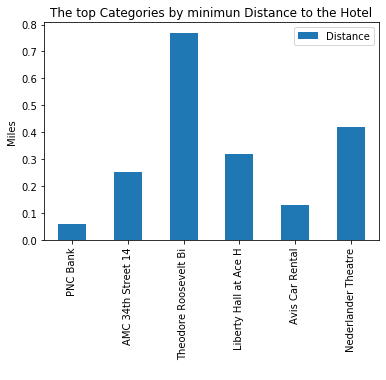

In [167]:
# The top Categories by minimun Distance to the Hotel
df1.plot.bar(x='Name', y='Distance', rot=0)
plt.title("The top Categories by minimun Distance to the Hotel")
plt.xticks(rotation=90)
plt.xlabel(" ")
plt.ylabel("Miles")

Text(0, 0.5, 'Numbers')

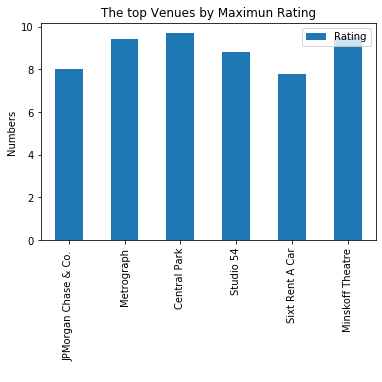

In [169]:
qmin = """Select Category, substr(Name,1,21) as Name, Likes, Distance, max(Rating) As Rating from Datanyc group by Category;"""
pysqldf = lambda qmin: sqldf(qmin, globals())
pysqldf
df1 = pysqldf(qmin)
# The top Categories by minimun Distance to the Hotel
df1.plot.bar(x='Name', y='Rating', rot=0)
plt.title("The top Venues by Maximun Rating")
plt.xticks(rotation=90)
plt.xlabel(" ")
plt.ylabel("Numbers")

Text(0, 0.5, 'Numbers')

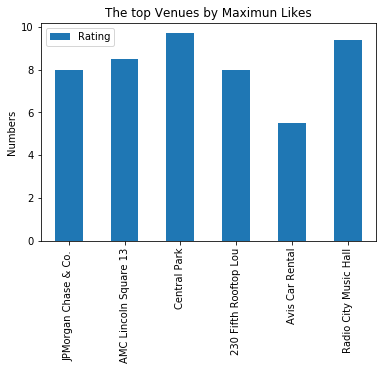

In [170]:
qmin = """Select Category, substr(Name,1,21) as Name, Rating, Distance, max(Likes) As Likes from Datanyc group by Category;"""
pysqldf = lambda qmin: sqldf(qmin, globals())
pysqldf
df1 = pysqldf(qmin)
# The top Categories by minimun Distance to the Hotel
df1.plot.bar(x='Name', y='Rating', rot=0)
plt.title("The top Venues by Maximun Likes")
plt.xticks(rotation=90)
plt.xlabel(" ")
plt.ylabel("Numbers")